# Kaggle: Facial Keypoints Detection

## Introduction
Goal: Predict keypoint positions on face images.

In [1]:
import pandas as pd
import numpy as np

## Step 1: Read the data into Pandas

In [2]:
# Data is pre-split into the training set, the test set, and a list of 27214 keypoints to 
# predict: training.csv, test.csv, IdLookupTable.csv

# The input image is given in the last field of the data files, and consists of a list of 
# pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

# Read data into a DataFrames
faces = pd.read_csv('./data/training.csv')
new_faces = pd.read_csv('./data/test.csv')
lookup = pd.read_csv('./data/IdLookupTable.csv')

In [3]:
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [4]:
faces.shape

(7049, 31)

In [5]:
faces.describe().T

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,NaN,NaN,NaN,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,NaN,NaN,NaN,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,NaN,NaN,NaN,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,NaN,NaN,NaN,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,NaN,NaN,NaN,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,NaN,NaN,NaN,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,NaN,NaN,NaN,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,NaN,NaN,NaN,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,NaN,NaN,NaN,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,NaN,NaN,NaN,69.808803


In [7]:
faces.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
faces.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


## Step 2: Preprocessing
- Missing data
- image processing

**Missing a lot of data.**<br>
Options:
1. Delete rows with missing data
2. Two models: one for eye centers and one for everything
3. Use ml to generate the missing data from the eye centers

Let's just delete the rows for now.

In [9]:
faces.dropna(inplace=True)

In [10]:
faces.shape

(2140, 31)

In [11]:
faces.rename(columns = {'Image':'image'}, inplace=True)

In [12]:
faces.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [13]:
# Change image column into a numpy array
faces.image = faces.image.apply(lambda im: np.fromstring(im, sep=' '))

In [14]:
faces.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239..."


In [15]:
new_faces.rename(columns = {'Image':'image'}, inplace=True)
new_faces.image = new_faces.image.apply(lambda im: np.fromstring(im, sep=' '))

In [16]:
new_faces.head(1)

,ImageId,image
0,1,"[182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176..."


In [16]:
faces.image[0]

array([ 238.,  236.,  237., ...,   70.,   75.,   90.])

In [17]:
# Define X and y

In [18]:
# X = faces.image
X = np.vstack(faces.ix[:, 'image']).astype(np.float)

In [19]:
X[0]

array([ 238.,  236.,  237., ...,   70.,   75.,   90.])

In [20]:
y = faces.drop('image', axis=1).values

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
X_train[0]

array([ 38.,  37.,  37., ...,   9.,  13.,   7.])

In [23]:
X.shape

(2140, 9216)

In [24]:
y_train.shape

(1605, 30)

In [25]:
X_train.shape

(1605, 9216)

## Step 3: Model building
- Explore options

### K-Nearest Neighbors
Just to get a feel for things. Multiple y values, Hmmm.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn = KNeighborsRegressor(5)

In [28]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
y_pred = knn.predict(X_test)

In [30]:
from sklearn import metrics

In [31]:
print metrics.mean_squared_error(y_test, y_pred)

6.16462922055


In [32]:
# To visualize each image, we thus need to first convert these 9216 integers into a 
# 96x96 matrix

im = X_train[0].reshape(96, 96)

In [33]:
im.shape

(96, 96)

In [37]:
%matplotlib inline

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

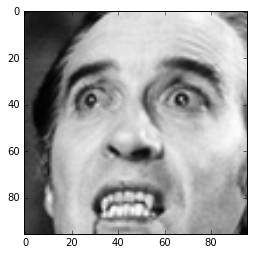

In [39]:
imgplot = plt.imshow(im, cmap='gray')

# Start again

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
images = pd.read_csv('./data/training.csv')

In [20]:
# Change image column into a numpy array
images.Image = images.Image.apply(lambda im: np.fromstring(im, sep=' '))

In [21]:
images.pic = images.Image.apply(lambda im: im.reshape(96, 96))

In [22]:
images.shape

(7049, 31)

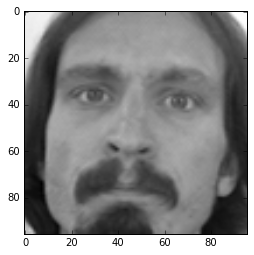

In [23]:
imgplot = plt.imshow(images.pic[0], cmap='gray')

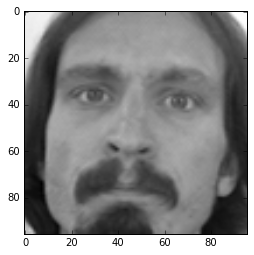

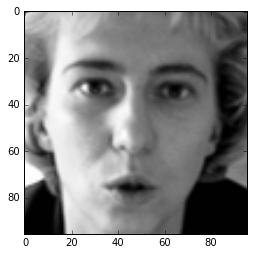

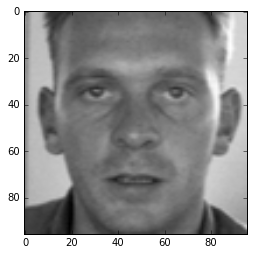

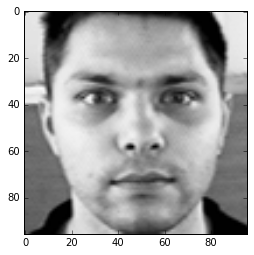

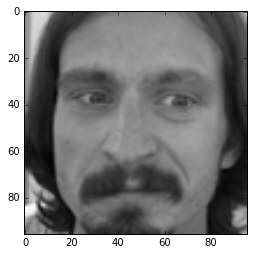

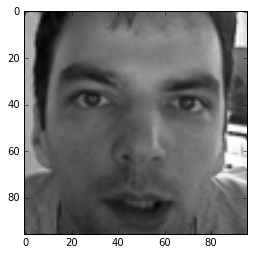

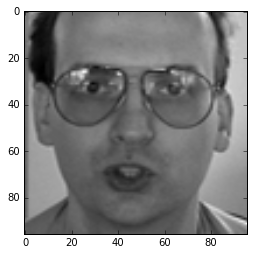

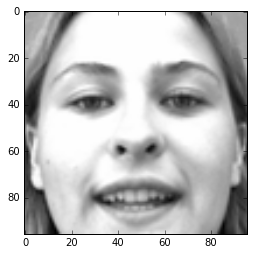

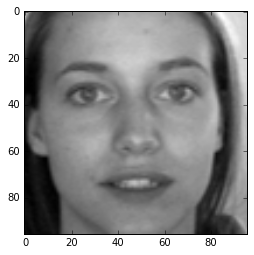

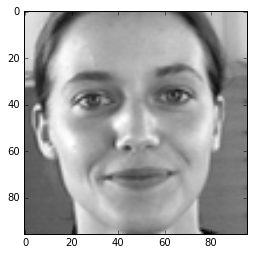

In [24]:
for i in range(0, 10):
    plt.imshow(images.pic[i], cmap='gray')
    plt.show()

(96, 0)

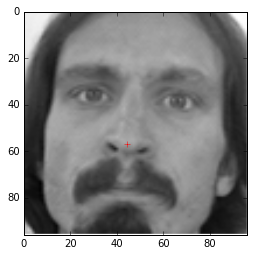

In [26]:
plt.imshow(images.pic[0], cmap='gray')
plt.plot(images.nose_tip_x[0], images.nose_tip_y[0], 'r+')
plt.xlim(0, 96)
plt.ylim(96, 0)

In [27]:
images.nose_tip_x[0], images.nose_tip_y[0]

(44.420571428599999, 57.066803007499999)

In [28]:
keypoints = images.drop('Image', axis=1)
keypoints

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,52.468486,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,46.855087,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,47.891883,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,48.069760,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,48.995077,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538


In [30]:
a = keypoints.values.tolist()
# pairs = zip(keypoints[0][0::2], keypoints[0][1::2])

In [31]:
a

[[66.0335639098,
  39.0022736842,
  30.2270075188,
  36.4216781955,
  59.582075188000005,
  39.647422556399995,
  73.1303458647,
  39.9699969925,
  36.3565714286,
  37.3894015038,
  23.4528721805,
  37.3894015038,
  56.9532631579,
  29.0336481203,
  80.2271278195,
  32.2281383459,
  40.2276090226,
  29.0023218045,
  16.3563789474,
  29.6474706767,
  44.4205714286,
  57.0668030075,
  61.1953082707,
  79.9701654135,
  28.6144962406,
  77.38899248119999,
  43.3126015038,
  72.9354586466,
  43.1307067669,
  84.4857744361],
 [64.3329361702,
  34.9700765957,
  29.949276595700002,
  33.4487148936,
  58.856170212799995,
  35.2743489362,
  70.7227234043,
  36.1871659574,
  36.034723404299996,
  34.3615319149,
  24.472510638299998,
  33.1444425532,
  53.9874042553,
  28.2759489362,
  78.634212766,
  30.405923404299998,
  42.7288510638,
  26.1460425532,
  16.8653617021,
  27.058859574499998,
  48.2062978723,
  55.6609361702,
  56.4214468085,
  76.352,
  35.122382978699996,
  76.0476595745,
  46.6

In [32]:
pairs = zip(a[0][0::2], a[0][1::2])
pairs

[(66.0335639098, 39.0022736842),
 (30.2270075188, 36.4216781955),
 (59.582075188000005, 39.647422556399995),
 (73.1303458647, 39.9699969925),
 (36.3565714286, 37.3894015038),
 (23.4528721805, 37.3894015038),
 (56.9532631579, 29.0336481203),
 (80.2271278195, 32.2281383459),
 (40.2276090226, 29.0023218045),
 (16.3563789474, 29.6474706767),
 (44.4205714286, 57.0668030075),
 (61.1953082707, 79.9701654135),
 (28.6144962406, 77.38899248119999),
 (43.3126015038, 72.9354586466),
 (43.1307067669, 84.4857744361)]

(96, 0)

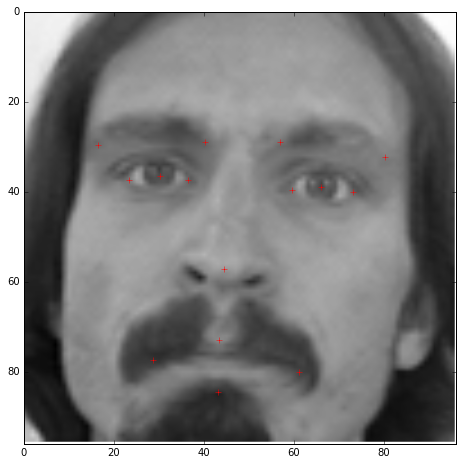

In [33]:
plt.imshow(images.pic[0], cmap='gray')
[plt.plot(pair[0], pair[1], 'r+') for pair in pairs]
plt.subplots_adjust(left=0.0, right=1.5, top=1.5, bottom=0.0)

#plt.show
plt.xlim(0, 96)
plt.ylim(96, 0)



(96, 0)

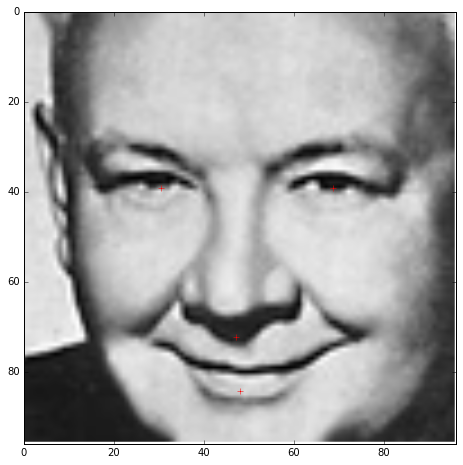

In [59]:
i = 6944
pairs = zip(a[i][0::2], a[i][1::2])
plt.imshow(images.pic[i], cmap='gray')
[plt.plot(pair[0], pair[1], 'r+') for pair in pairs]
plt.subplots_adjust(left=0.0, right=1.5, top=1.5, bottom=0.0)

#plt.show
plt.xlim(0, 96)
plt.ylim(96, 0)


In [21]:
keypoints.min()

left_eye_center_x            22.763345
left_eye_center_y             1.616512
right_eye_center_x            0.686592
right_eye_center_y            4.091264
left_eye_inner_corner_x      19.064954
left_eye_inner_corner_y      27.190098
left_eye_outer_corner_x      27.571879
left_eye_outer_corner_y      26.250023
right_eye_inner_corner_x      5.751046
right_eye_inner_corner_y     26.250023
right_eye_outer_corner_x      3.980117
right_eye_outer_corner_y     25.123828
left_eyebrow_inner_end_x     17.888717
left_eyebrow_inner_end_y     15.859361
left_eyebrow_outer_end_x     32.206432
left_eyebrow_outer_end_y     10.522325
right_eyebrow_inner_end_x     6.921014
right_eyebrow_inner_end_y    16.476000
right_eyebrow_outer_end_x     3.826243
right_eyebrow_outer_end_y    13.224453
nose_tip_x                   12.944699
nose_tip_y                   17.932414
mouth_left_corner_x          22.923362
mouth_left_corner_y          57.023258
mouth_right_corner_x          2.245766
mouth_right_corner_y     

(96, 0)

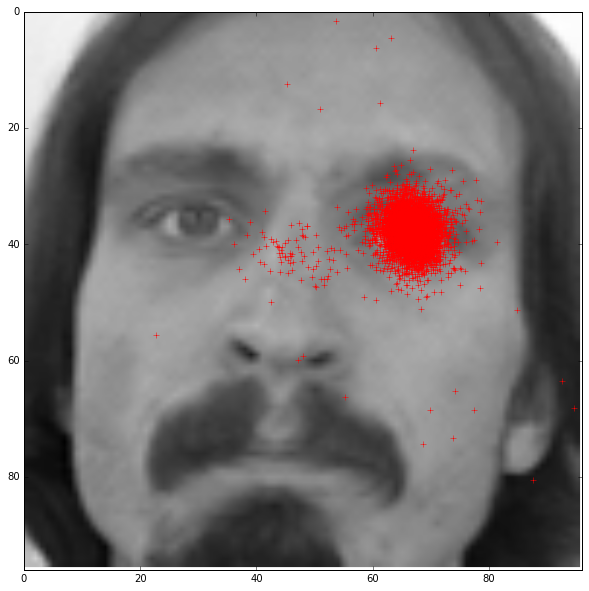

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(images.pic[0], cmap='gray')
for i in range(keypoints.shape[0]): #keypoints.shape[0]
    plt.plot(keypoints.left_eye_center_x[i], keypoints.left_eye_center_y[i], 'r+')
plt.xlim(0, 96)
plt.ylim(96, 0)


(96, 0)

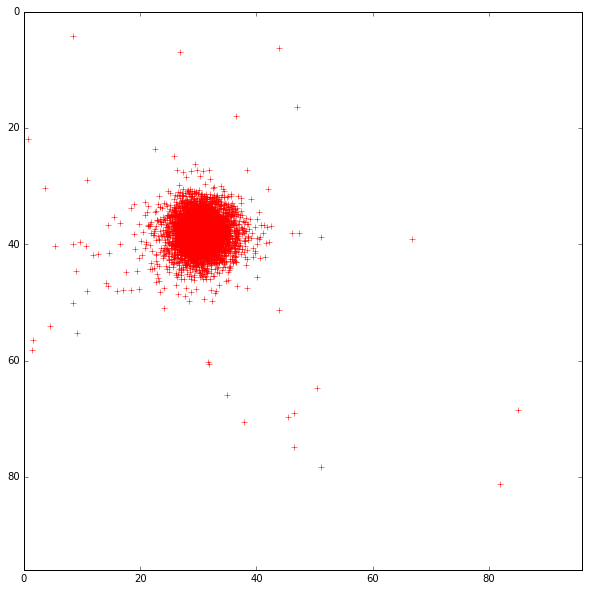

In [33]:
plt.figure(figsize=(10,10))
#plt.imshow(images.pic[0], cmap='gray')
for i in range(keypoints.shape[0]): #keypoints.shape[0]
    plt.plot(keypoints.right_eye_center_x[i], keypoints.right_eye_center_y[i], 'r+')
plt.xlim(0, 96)
plt.ylim(96, 0)



# TensorFlow

In [34]:
import tensorflow as tf

In [35]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [36]:
a = tf.constant(10)
b = tf.constant(32)
sess.run(a + b)

42

## Investigation of saber1988's solution

https://github.com/saber1988/facial-keypoints-detection

This network contains 2 convolutional layers and 2 fully connected layers, and the output layer is linear. Each convolutional layer is followed by a max-pooling layer, and use relu as activation function.

The loss of this system is squared errors(l2 loss), and use AdamOptimizer to minimize the loss. The doc of AdamOptimizer can be found here.

When I use GradientDescentOptimizer and MomentumOptimizer, parameters can’t converge, do you ever meet similar problem?

...

In [37]:
import skflow

In [38]:
from sklearn import metrics